### 教学

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
models=[('lr',LogisticRegression()),('svm',SVC())]
ensemble=VotingClassifier(estimators=models)

In [ ]:
models = [('lr', LogisticRegression()),
          ('svm', make_pipeline(StandardScaler(), SVC()))]
ensemble = VotingClassifier(estimators=models)

In [ ]:
models = [('lr',LogisticRegression()),('svm',SVC())]
ensemble = VotingClassifier(estimators=models, voting='soft')

### 完整演示

In [14]:
from sklearn.datasets import make_classification
# 生成数据集
def get_dataset():
    x,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)
    return x,y

#### 使用多个KNN模型作为基模型，每个模型采用不同的邻居值参数K

In [15]:
def get_voting():
    models=list()
    models.append(('knn1',KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3',KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5',KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7',KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9',KNeighborsClassifier(n_neighbors=9)))
    
    ensemble=VotingClassifier(estimators=models,voting='hard')
    return ensemble

然后创建一个模型列表来评估投票带来的提升

In [16]:
def get_models():
    models=dict()
    models["knn1"]=KNeighborsClassifier(n_neighbors=1)
    models["knn3"]=KNeighborsClassifier(n_neighbors=3)
    models["knn5"]=KNeighborsClassifier(n_neighbors=5)
    models["knn7"]=KNeighborsClassifier(n_neighbors=7)
    models["knn9"]=KNeighborsClassifier(n_neighbors=9)
    models["hard_voting"]=get_voting()
    return models

In [19]:
# 接收一个模型实例，并以分层10倍交叉验证三次重复的分数列表形式返回
from sklearn.model_selection import cross_val_score # 交叉验证
from sklearn.model_selection import RepeatedStratifiedKFold
def evaluate_model(model,x,y):
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    scores=cross_val_score(model,x,y,scoring="accuracy",cv=cv,n_jobs=-1,error_score="raise")
    return scores

然后，我们可以报告每个算法的平均性能

>knn1 0.876 (0.030)
>knn3 0.889 (0.036)
>knn5 0.894 (0.028)
>knn7 0.899 (0.033)
>knn9 0.900 (0.031)
>hard_voting 0.902 (0.031)


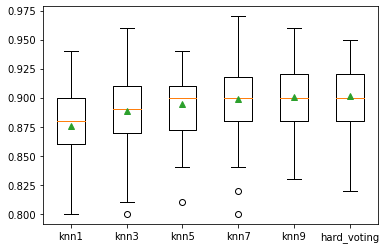

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import numpy as np

x,y=get_dataset()
models=get_models()

results,names=list(),list()
for name,model in models.items():
    scores=evaluate_model(model,x,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)'% (name,np.mean(scores),np.std(scores)))
plt.boxplot(results,labels=names,showmeans=True)
plt.show()